<a href="https://colab.research.google.com/github/MentalTorque/food_sales_data/blob/main/Food_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Nick Staich

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


filename = '/content/drive/My Drive/Coding Dojo/sales_predictions.csv'

df = pd.read_csv(filename)
df.head()




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 1) How many rows and columns?

In [46]:
#Determine the dataset's row & column counts
df.shape

(8523, 12)

Using df.shape, it is clear that this data set has 8523 observations across 12 features.

# 2) What are the datatypes of each variable?

In [47]:
#Determine the dataset's datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# 3) Are there duplicates? If so, drop any duplicates.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [49]:
duplicate = df[df.duplicated()]
duplicate

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


There do not seem to be any duplicated rows...YAY!

# 4) Identify missing values.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


It is clear from df.info() that we have some work to do in the Item_weight and Outlet_Size features, as they have values less than the total count of observations.

## Item_Weight missing data correction

In [51]:
#Identify the missing values in Item_Weight
df['Item_Weight'].isna().value_counts()

False    7060
True     1463
Name: Item_Weight, dtype: int64

It is confirmed that there are 1463 observations missing data in the 'Item_Weight' feature, 17% of all entries.

In [52]:
#Get the rows where 'Item_Weight' is NaN
item_weight_miss = df['Item_Weight'].isna()
df.loc[item_weight_miss, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


## Outlet_Size missing data correction

In [53]:
#Identify the missing values in Outlet_Size
df['Outlet_Size'].isna().value_counts()

False    6113
True     2410
Name: Outlet_Size, dtype: int64

It is confirmed that there are 2410 observations missing data in the 'Outlet_Size' feature, 28% of all entries are corrupted. 

(Yes, I could have invoked the .sum() method, but I like this way because I can see that the total data values equal 100%)

In [54]:
#Get the rows where 'Outlet_Size' is NaN
outlet_size_miss = df['Outlet_Size'].isna()
df.loc[outlet_size_miss, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Let's see how many rows are missing both values:

In [55]:
#Let's see how many rows are missing both values:
clean = df.loc[item_weight_miss & outlet_size_miss,:]
clean.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Welp...it couldn't be that easy, could it.

# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

## Determine Approach to cleansing Item_Weight

In [66]:
#Determine Approach to cleansing 'Item_Weight'
#Get the rows where 'Item_Weight' is NaN
#item_weight_miss = df['Item_Weight'].isna()
#df.loc[item_weight_miss, :]

Item_Weight_Mean = df['Item_Weight'].mean()  #Based on Will's feedback, I changed my approach and am calculating the mean of Item Weights into a variable that I can pass into the replace method.
Item_Weight_Mean

df['Item_Weight'].fillna(12.858, inplace=True)
df['Item_Weight']

df['Item_Weight'].value_counts()

#Fixed the values with a mean value to preserve the data instead of tossing it.

12.858    1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

This is a tough call, especially since I have no insight into what I am going to be trying to model later on, so I have limited visibility to which variables in my present dataset may have the highest coefficient of correlation.  As a Quality Engineer, any dataset missing 20% of it's content is immediately suspect, and given the nature of machine learning and algorithmic programming, assigning incorrect values through forward fill and back fill, as well as linear interpolation can corrupt the overall calculations.

I'm going to have to remove this column too, at this time, though I really don't like that I've lost 16% of the features in my dataset.  The Item_Weight is a value I could see being existant in a data source somewhere else that could be appended in later and the models re-run at that time.

##Determine Approach to cleansing Outlet_Size

In [67]:
#Determine Approach to cleansing Outlet_Size
check1 = df['Outlet_Identifier']=='OUT010'
df.loc[check1,:]
check1.value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

OK, so this 1 outlet 'Out010' is missing 555 'Outlet_Size' observations, roughly 20% of the missing values, but would contribute 5555 other observations to the data model.  That said, there are still 1600 missing entries in that column, which is categorical and seems only loosely corellated to sales volume, and I am not sure if the outlet size would be as impactful in later modeling.  I think the best bet would be to remove the 'Outlet_Size' column altogether.

In [68]:
#dropping the columns from the dataframe as we've discussed
df = df.drop(columns=['Outlet_Size'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


# 6) Confirm that there are no missing values after addressing them.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [70]:
df.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

There do not seem to be any inconsistencies in the nomenclature.  There are semantic discussions to be had around naming conventions and personal preferences ('Outlet_Establishment_Year' instead of 'Founded', I mean, really...?) but from an overall performance standpoint these category labels are both readable, consistent in convention, and informative with respect to their content.

Let's check within the columns themselves, to ensure the data is properly cleansed.

In [71]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [72]:
IFC = df.value_counts(['Item_Fat_Content'])
IFC

Item_Fat_Content
Low Fat             5089
Regular             2889
LF                   316
reg                  117
low fat              112
dtype: int64

Yeah, this is a major problem.  There are a lot of misaligned references, where LF, low fat, and Low Fat are obviously the same thing, as is reg and Regular.  Let's convert everything aroung the major categories of Low Fat and Regular.

In [73]:
#df['Item_Fat_Content'] = np.where(df['Item_Fat_Content'] == 'LF', 'Low Fat', df['Item_Fat_Content'])
#IFC

df['Item_Weight'].isna().value_counts(normalize=True)


False    1.0
Name: Item_Weight, dtype: float64

# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [74]:
#Let's review our columns, counts, and dtypes...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [75]:
#Now we'll take the 4 columns with numerical values and run descriptive summary statistics on them.
df[['Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Alright.  Not bad.  We are ready to start some analysis.

#Week 3 -  Project 1 - Part 3 (Core)


We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. 

This must include at least one of each:

* Histogram to view the distributions of various features in your dataset.
* Boxplot to view statistical summaries of various features in your dataset.
* Heatmap of the correlation between features.

Please feel free to add more than the minimum. Remember this is your chance to display your skills!



Commit your work to GitHub. 

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

In [76]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012046,0.024756,-0.008323,0.011553
Item_Visibility,-0.012046,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008323,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011553,-0.128625,0.567574,-0.049135,1.000000


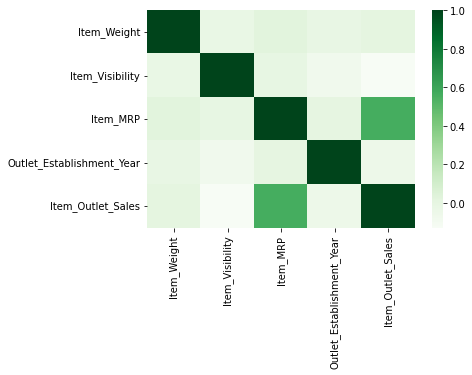

In [81]:
corr = df.corr()
sns.heatmap(corr, cmap='Greens')

#So a very interesting finding from the correlations matrix.  There is a relatively strong correlation between Item_MRP and Item_Outlet_Sales, telling me that we are seeing 
#very real price elasticity in what people are willing to purchase.  One thing that is contrarian to most incoming assumptions with the data set is that there is very
#little strength in the correlation between Item Outlet Sales and Item Visibility.  Given the wide The data, at this time, is telling us it is not so important that people see your product, 
# only that it must fall into the right price point if they do.  

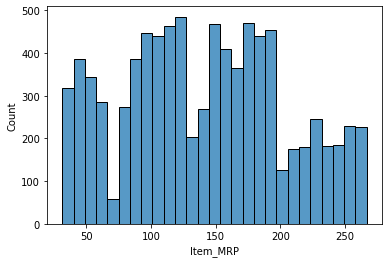

In [85]:
# So let's plot the ditribution of Item MRPs. 

 sns.histplot(data=df, x='Item_MRP', stat='count');

 # If my hypothesis is tracking, the mean should be 
 #somewhat left of center, as the price elasticity will
 # drive consumers to higher volumes of lower cost goods
 #to extend their purchasing power...it seems as though it is.

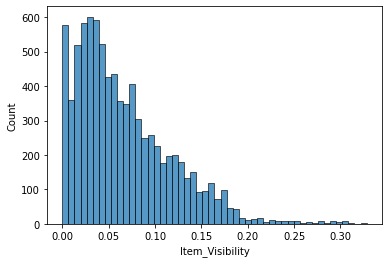

In [86]:
#I am curious about the visibility statistics...

sns.histplot(data=df, x='Item_Visibility', stat='count');

# Well that's interesting...the distribution is an F-Distribution and not a normalized 
# distribution.  this explains the weak correlation value, but I am curious about the
# percentage of sales generated fromItem Visibility scores above 0.20.

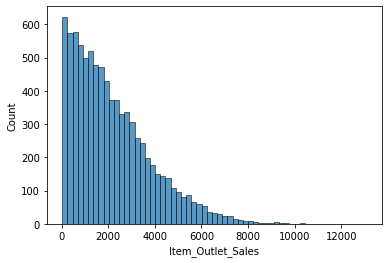

In [95]:
#sales_to_visibility_filter = df.groupby(['MRP'])['Item_Outlet_Sales']>=0.20
outlets = df.groupby('Outlet_Identifier')
sns.histplot(data=df, x='Item_Outlet_Sales')

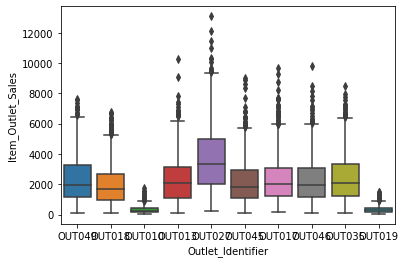

In [97]:
sns.boxplot(data=df, x='Outlet_Identifier', y='Item_Outlet_Sales',);

NameError: ignored

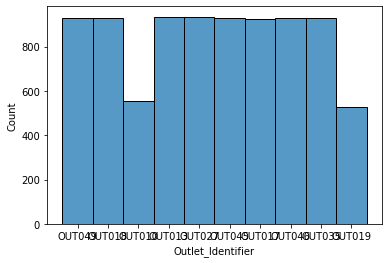

In [104]:
sns.histplot(data=df, x='Outlet_Identifier',)
plt.xticks(rotation-45)

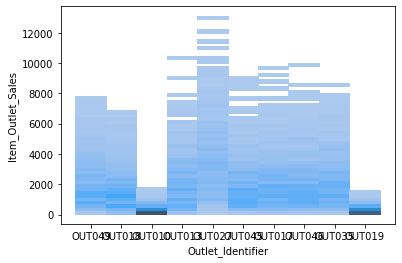

In [100]:
sns.histplot(data=df, x='Outlet_Identifier',y='Item_Outlet_Sales')